# Task 7: Basic Sales Summary from SQLite Database using Python

**Objective**: Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and display it using basic print statements and a simple bar chart.

**Tools**: Python (sqlite3, pandas, matplotlib), SQLite, Jupyter Notebook

---


## 1. Import Required Libraries

First, let's import all the necessary libraries for our analysis.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


## 2. Connect to SQLite Database

We'll connect to our `sales_data.db` SQLite database.


In [3]:
# Connect to the SQLite database
conn = sqlite3.connect('sales_data.db')
print("✅ Successfully connected to sales_data.db")

# Let's check what tables exist in our database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(f"📋 Tables in database: {[table[0] for table in tables]}")


✅ Successfully connected to sales_data.db
📋 Tables in database: ['sales', 'sqlite_sequence']


## 3. Run Basic SQL Query

Now let's run our main SQL query to get sales summary by product, as specified in the task.


In [4]:
# Main SQL query for sales summary (as specified in the task)
query = """
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
ORDER BY revenue DESC
"""

print("🔍 Running SQL Query:")
print("=" * 50)
print(query)
print("=" * 50)

# Execute query and load results into pandas DataFrame
df = pd.read_sql_query(query, conn)
print("✅ Query executed successfully!")


🔍 Running SQL Query:

SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
ORDER BY revenue DESC

✅ Query executed successfully!


## 4. Display Results using Print


In [5]:
# Display the DataFrame using print
print("📊 SALES SUMMARY RESULTS:")
print("=" * 50)
print(df)

print("\n📈 KEY METRICS:")
print(f"💰 Total Revenue: ${df['revenue'].sum():.2f}")
print(f"📦 Total Quantity Sold: {df['total_qty'].sum()}")
print(f"🛍️  Number of Products: {len(df)}")
print(f"🥇 Top Product by Revenue: {df.iloc[0]['product']} (${df.iloc[0]['revenue']:.2f})")


📊 SALES SUMMARY RESULTS:
     product  total_qty  revenue
0      Salad         66   783.24
1   Sandwich         64   563.64
2   Smoothie         79   470.02
3       Soup         55   344.80
4     Coffee         62   280.61
5      Juice         73   273.57
6     Muffin         63   219.81
7      Bagel         62   185.19
8        Tea         46   148.75
9  Croissant         28   119.19

📈 KEY METRICS:
💰 Total Revenue: $3388.82
📦 Total Quantity Sold: 598
🛍️  Number of Products: 10
🥇 Top Product by Revenue: Salad ($783.24)


## 5. Create Basic Bar Chart (As Required in Task)


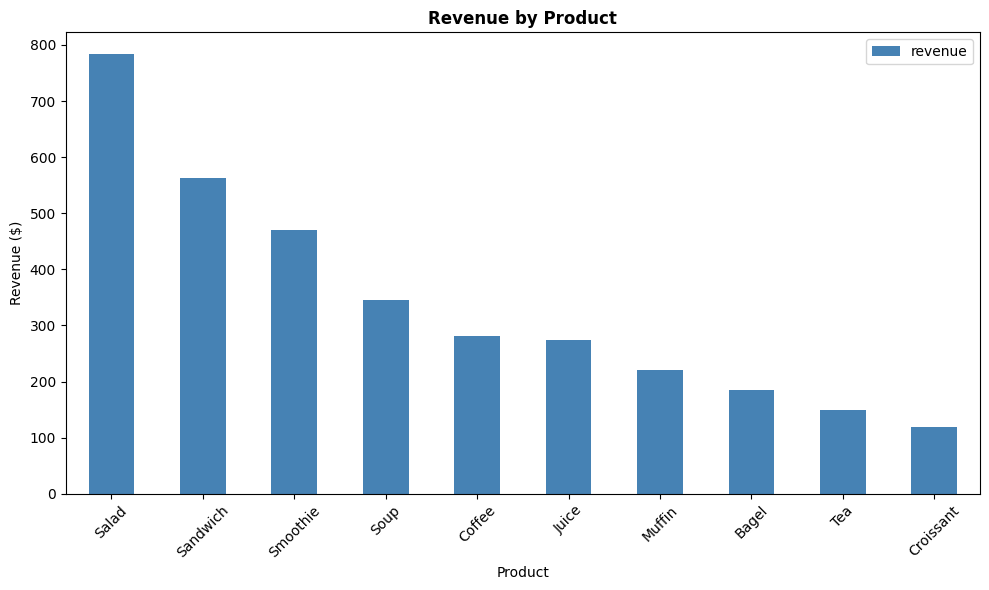

💾 Chart saved as: sales_chart.png


In [6]:
# Create simple bar chart as specified in the task
df.plot(kind='bar', x='product', y='revenue', figsize=(10, 6), color='steelblue')
plt.title('Revenue by Product', fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart if needed (as mentioned in hints)
plt.savefig("sales_chart.png")
plt.show()

print("💾 Chart saved as: sales_chart.png")


## 7. Additional SQL Query for Enhanced Analysis


In [7]:
# Enhanced query with more metrics for the dashboard
enhanced_query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue,
    AVG(price) AS avg_price,
    COUNT(*) AS num_transactions
FROM sales 
GROUP BY product
ORDER BY revenue DESC
"""

df_enhanced = pd.read_sql_query(enhanced_query, conn)
print("📊 Enhanced Sales Summary:")
print(df_enhanced)


📊 Enhanced Sales Summary:
     product  total_qty  revenue  avg_price  num_transactions
0      Salad         66   783.24  11.906522                23
1   Sandwich         64   563.64   8.812381                21
2   Smoothie         79   470.02   5.925185                27
3       Soup         55   344.80   6.263750                16
4     Coffee         62   280.61   4.513158                19
5      Juice         73   273.57   3.751304                23
6     Muffin         63   219.81   3.462727                22
7      Bagel         62   185.19   2.960000                21
8        Tea         46   148.75   3.215294                17
9  Croissant         28   119.19   4.250909                11


## 8. Create Comprehensive Sales Dashboard


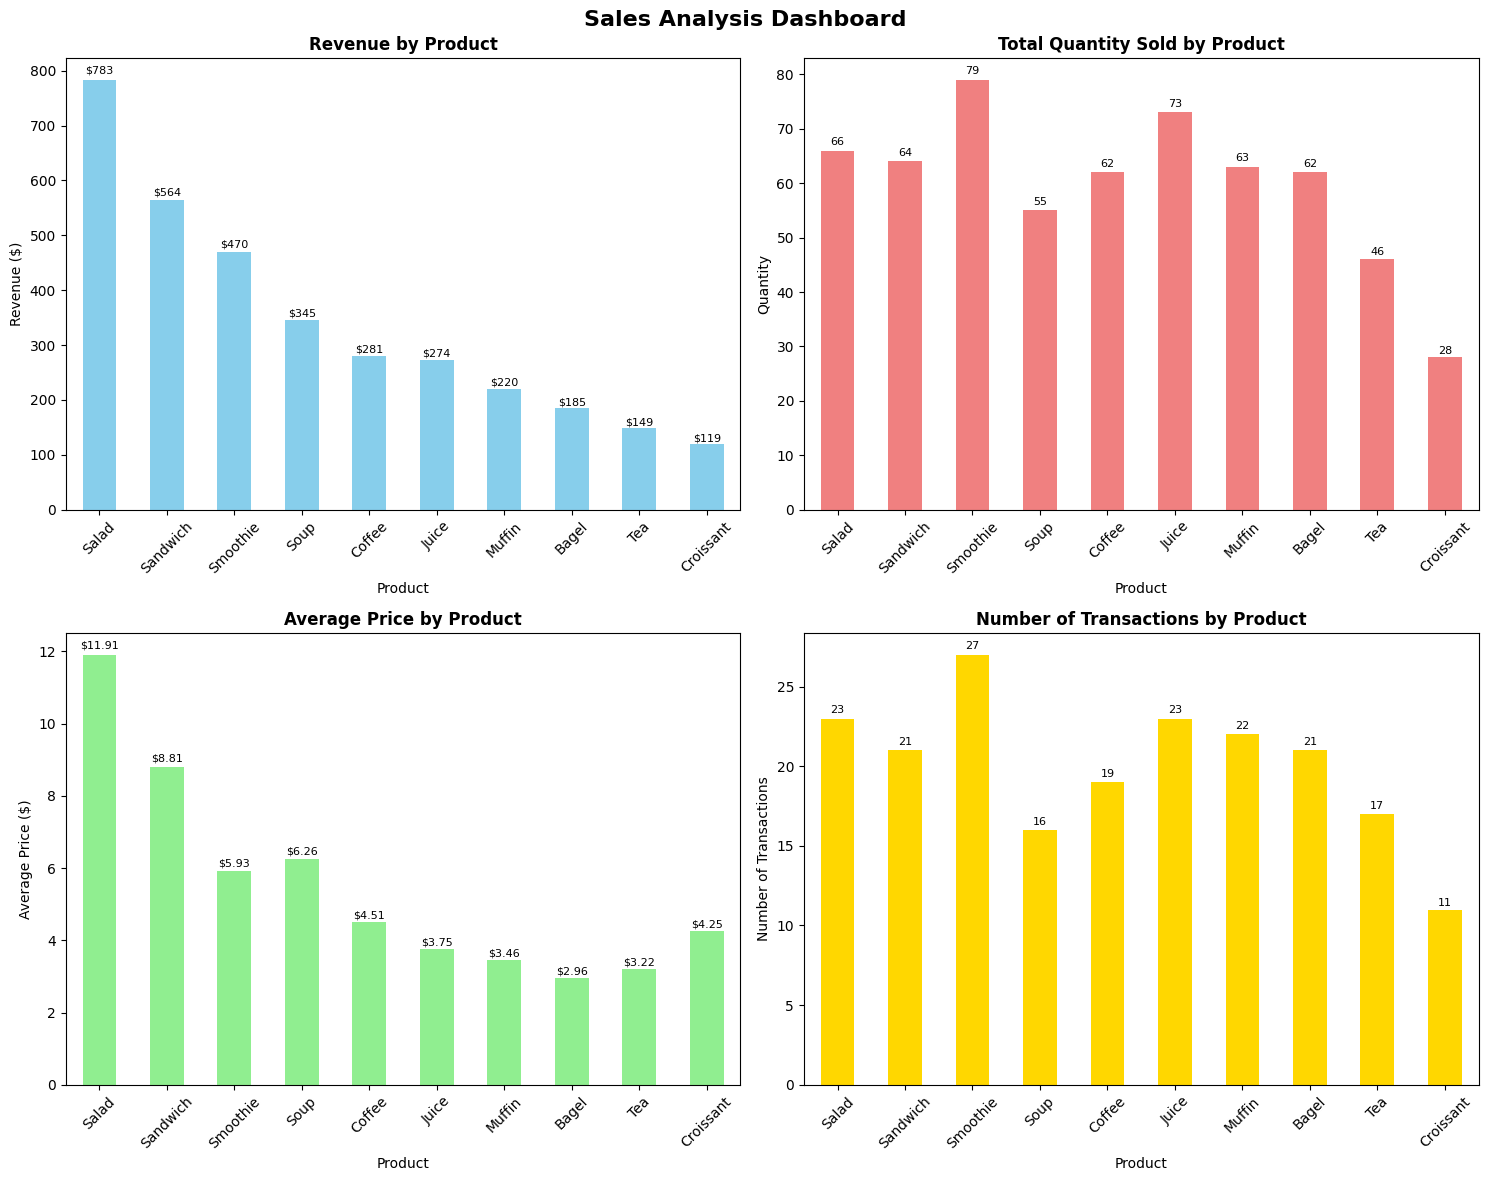

💾 Dashboard saved as: sales_analysis_dashboard.png


In [8]:
# Create comprehensive dashboard with multiple charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Revenue by Product
df_enhanced.plot(kind='bar', x='product', y='revenue', ax=ax1, color='skyblue', legend=False)
ax1.set_title('Revenue by Product', fontweight='bold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(df_enhanced['revenue']):
    ax1.text(i, v + v*0.01, f'${v:.0f}', ha='center', va='bottom', fontsize=8)

# 2. Quantity Sold by Product
df_enhanced.plot(kind='bar', x='product', y='total_qty', ax=ax2, color='lightcoral', legend=False)
ax2.set_title('Total Quantity Sold by Product', fontweight='bold')
ax2.set_xlabel('Product')
ax2.set_ylabel('Quantity')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(df_enhanced['total_qty']):
    ax2.text(i, v + v*0.01, f'{v}', ha='center', va='bottom', fontsize=8)

# 3. Average Price by Product
df_enhanced.plot(kind='bar', x='product', y='avg_price', ax=ax3, color='lightgreen', legend=False)
ax3.set_title('Average Price by Product', fontweight='bold')
ax3.set_xlabel('Product')
ax3.set_ylabel('Average Price ($)')
ax3.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(df_enhanced['avg_price']):
    ax3.text(i, v + v*0.01, f'${v:.2f}', ha='center', va='bottom', fontsize=8)

# 4. Number of Transactions by Product
df_enhanced.plot(kind='bar', x='product', y='num_transactions', ax=ax4, color='gold', legend=False)
ax4.set_title('Number of Transactions by Product', fontweight='bold')
ax4.set_xlabel('Product')
ax4.set_ylabel('Number of Transactions')
ax4.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(df_enhanced['num_transactions']):
    ax4.text(i, v + v*0.01, f'{v}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Save the dashboard
plt.savefig('sales_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Dashboard saved as: sales_analysis_dashboard.png")


## 9. Close Database Connection


In [9]:
# Close the database connection
conn.close()
print("🔌 Database connection closed.")
print("✅ Sales analysis completed successfully!")


🔌 Database connection closed.
✅ Sales analysis completed successfully!


---

## Interview Questions & Answers

**Q: How did you connect Python to a database?**  
A: I used the `sqlite3` library (built into Python) with `sqlite3.connect("sales_data.db")`

**Q: What SQL query did you run?**  
A: I ran a GROUP BY query: `SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product`

**Q: What does GROUP BY do?**  
A: GROUP BY aggregates rows with the same values in specified columns into groups, allowing aggregate functions like SUM() to be applied to each group separately.

**Q: How did you calculate revenue?**  
A: Revenue = SUM(quantity * price) - I multiplied quantity by price for each sale and summed the results for each product group.

**Q: How did you visualize the result?**  
A: I used matplotlib to create bar charts showing revenue by product with `df.plot(kind='bar', x='product', y='revenue')`

**Q: What does pandas do in your code?**  
A: Pandas loads SQL query results into a DataFrame using `pd.read_sql_query()`, providing easy data manipulation and integration with matplotlib for plotting.

**Q: What's the benefit of using SQL inside Python?**  
A: Combines SQL's powerful querying capabilities with Python's data analysis tools, allowing efficient data extraction and seamless integration with visualization libraries.

**Q: Could you run the same SQL query directly in DB Browser for SQLite?**  
A: Yes, the exact same SQL query can be run in DB Browser for SQLite or any SQLite client to get the same results.
